In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import properscoring
import numpy as np
from scipy.stats import norm

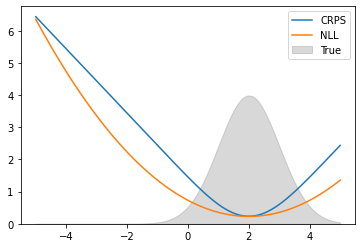

In [2]:
mu, sigma = 2, 1
x = np.linspace(-5, 5, 1000)
crps = properscoring.crps_gaussian(x, mu=mu, sig=sigma)
nll = -norm.logpdf(x, loc=mu, scale=sigma)
dist = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, crps, label='CRPS')
plt.plot(x, nll / 4, label='NLL')
plt.fill_between(x, 0, dist * 10, color='gray', alpha=0.3, label='True')
plt.ylim(bottom=0)
plt.legend()

In [3]:
norms_params = [
    (0, 1),
    (1, 1),
    (3, 1),
    (2, 1.1),
    (2, 0.9),
    (2.1, 1),
    (1.9, 1),
    (2, 1),
]

In [4]:
true_mu, true_sigma = 2, 1
x = np.linspace(-30, 30, 10000)

for norm_params in norms_params:
    print('===========')
    print(norm_params)
    pred_mu, pred_sigma = norm_params
    y = properscoring.crps_gaussian(x, mu=pred_mu, sig=pred_sigma)
    pdf = norm.pdf(x, loc=true_mu, scale=true_sigma)
    expectation = np.mean(y * pdf)
    print(expectation)

(0, 1)
0.025602764463704852
(1, 1)
0.013916822731890252
(3, 1)
0.013916822731890252
(2, 1.1)
0.009424592970271138
(2, 0.9)
0.009426944981350436
(2.1, 1)
0.009449210928704982
(1.9, 1)
0.009449210928704984
(2, 1)
0.00940221940982336
